In [1]:
import games
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing.pool import Pool

# np.random.seed(50)

population = 100
num_groups = 20
num_generations = 150
num_simulations = 100
cost_benefit_ratio = 0.3
group_split_threshold = 10
group_split_method = 'empty'
group_split_probabilistic = False

const_cooperation_thresholds = [int(0), int(1), int(3), int(5), int(10)]
frac_cooperation_thresholds = [0.0, 0.1, 0.2, 0.4, 0.7, 1.0]

const_args = [[population, num_groups, num_generations, cost_benefit_ratio, ct, group_split_threshold, 
         group_split_method, group_split_probabilistic, 'snowdrift'] for ct in const_cooperation_thresholds]
frac_args = [[population, num_groups, num_generations, cost_benefit_ratio, ct, group_split_threshold, 
         group_split_method, group_split_probabilistic, 'snowdrift'] for ct in frac_cooperation_thresholds]
args = const_args + frac_args

with Pool() as pool:
    all_results = pool.starmap(games.group_split_game_many, [[num_simulations] + arg for arg in args])


In [2]:

population_per_gen = [[variant[j][3] for j in range(num_simulations)] for variant in all_results]
mean_population_per_gen = np.mean(population_per_gen, axis=1)
std_population_per_gen = np.std(population_per_gen, axis=1)

cooperation_per_gen = [[variant[j][4] for j in range(num_simulations)] for variant in all_results]
mean_cooperation_per_gen = np.mean(cooperation_per_gen, axis=1)
std_cooperation_per_gen = np.std(cooperation_per_gen, axis=1)

total_reward_per_gen = [[variant[j][5] for j in range(num_simulations)] for variant in all_results]
mean_total_reward_per_gen = np.mean(total_reward_per_gen, axis=1)
std_total_reward_per_gen = np.std(total_reward_per_gen, axis=1)


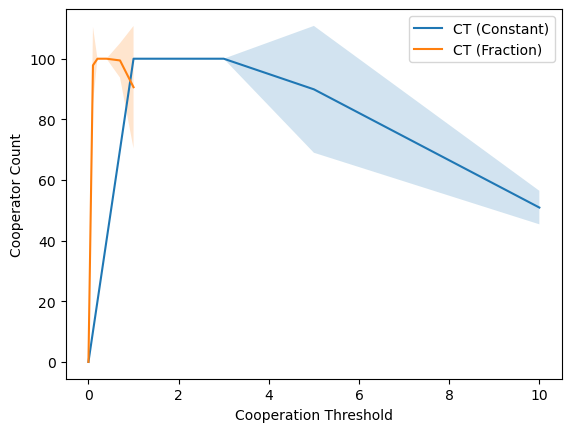

In [16]:

const_mean_cooperation_final = np.array([simulation[-1] for simulation in mean_cooperation_per_gen[:len(const_cooperation_thresholds)]])
const_std_cooperation_final = np.array([simulation[-1] for simulation in std_cooperation_per_gen[:len(const_cooperation_thresholds)]])
frac_mean_cooperation_final = np.array([simulation[-1] for simulation in mean_cooperation_per_gen[len(const_cooperation_thresholds):]])
frac_std_cooperation_final = np.array([simulation[-1] for simulation in std_cooperation_per_gen[len(const_cooperation_thresholds):]])

plt.plot(const_cooperation_thresholds, const_mean_cooperation_final, label="CT (Constant)")
plt.fill_between(const_cooperation_thresholds, const_mean_cooperation_final - const_std_cooperation_final, 
                 const_mean_cooperation_final + const_std_cooperation_final, alpha=0.2)

plt.plot(frac_cooperation_thresholds, frac_mean_cooperation_final, label="CT (Fraction)")
plt.fill_between(frac_cooperation_thresholds, frac_mean_cooperation_final - frac_std_cooperation_final, 
                 frac_mean_cooperation_final + frac_std_cooperation_final, alpha=0.2)
# plt.xticks(frac_cooperation_thresholds + frac_cooperation_thresholds)
plt.ylabel('Cooperator Count')
plt.xlabel('Cooperation Threshold')
plt.legend()
# plt.grid()

plt.savefig("..\\figures\\var_coop_threshold_const_frac.png", bbox_inches='tight', transparent=True)
plt.show()


# Snowdrift (Constant)

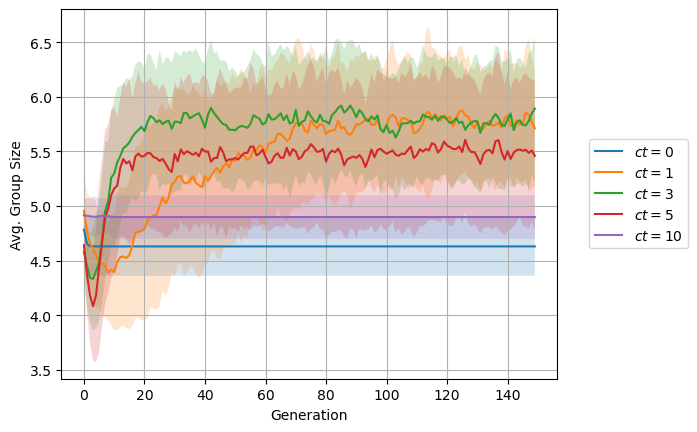

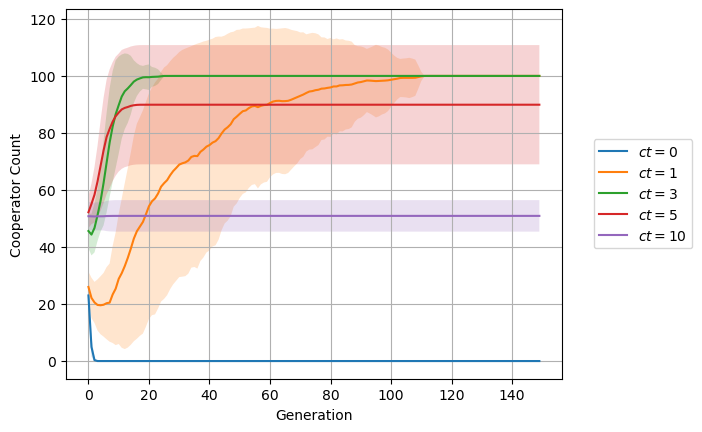

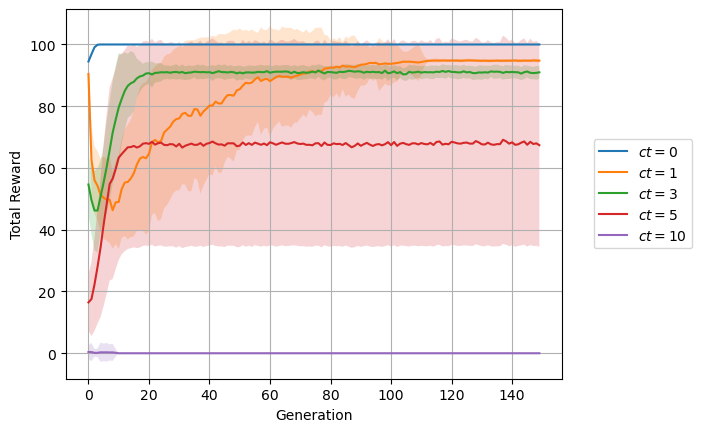

In [13]:

# plt.title(f'Group Split w/ Snowdrift Game\nVarying Cost/Benefit Ratio')
for i in range(len(const_cooperation_thresholds)):
    plt.plot(mean_population_per_gen[i], label=f'$ct={const_cooperation_thresholds[i]}$')
    plt.fill_between(np.arange(num_generations), mean_population_per_gen[i] - std_population_per_gen[i], 
                     mean_population_per_gen[i] + std_population_per_gen[i], alpha=0.2)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.ylabel('Avg. Group Size')
plt.xlabel('Generation')
plt.grid()
# plt.savefig("..\\figures\\var_coop_threshold_y_avg_group_size_const.png", bbox_inches='tight', transparent=True)
plt.show()

# plt.title(f'Group Split w/ Snowdrift Game\nVarying Cost/Benefit Ratio')
for i in range(len(const_cooperation_thresholds)):
    plt.plot(mean_cooperation_per_gen[i], label=f'$ct={const_cooperation_thresholds[i]}$')
    plt.fill_between(np.arange(num_generations), mean_cooperation_per_gen[i] - std_cooperation_per_gen[i], 
                     mean_cooperation_per_gen[i] + std_cooperation_per_gen[i], alpha=0.2)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.ylabel('Cooperator Count')
plt.xlabel('Generation')
plt.grid()
# plt.savefig("..\\figures\\var_coop_threshold_y_cooperation_const.png", bbox_inches='tight', transparent=True)
plt.show()

# plt.title(f'Group Split w/ Snowdrift Game\nVarying Cost/Benefit Ratio')
for i in range(len(const_cooperation_thresholds)):
    plt.plot(mean_total_reward_per_gen[i], label=f'$ct={const_cooperation_thresholds[i]}$')
    plt.fill_between(np.arange(num_generations), mean_total_reward_per_gen[i] - std_total_reward_per_gen[i], 
                     mean_total_reward_per_gen[i] + std_total_reward_per_gen[i], alpha=0.2)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.ylabel('Total Reward')
plt.xlabel('Generation')
plt.grid()
# plt.savefig("..\\figures\\var_coop_threshold_y_total_reward_const.png", bbox_inches='tight', transparent=True)
plt.show()


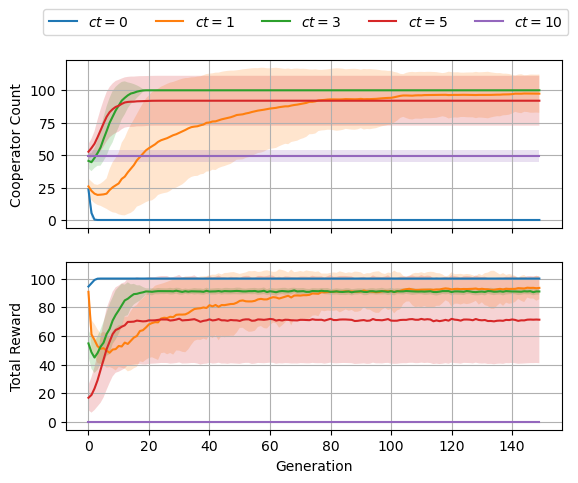

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6.4, 4.8))

for i in range(len(const_cooperation_thresholds)):
    ax1.plot(mean_cooperation_per_gen[i], label=f'$ct={const_cooperation_thresholds[i]}$')
    ax1.fill_between(np.arange(num_generations), mean_cooperation_per_gen[i] - std_cooperation_per_gen[i], 
                     mean_cooperation_per_gen[i] + std_cooperation_per_gen[i], alpha=0.2)
ax1.set(ylabel='Cooperator Count')
ax1.grid()

for i in range(len(const_cooperation_thresholds)):
    ax2.plot(mean_total_reward_per_gen[i], label='')
    ax2.fill_between(np.arange(num_generations), mean_total_reward_per_gen[i] - std_total_reward_per_gen[i], 
                     mean_total_reward_per_gen[i] + std_total_reward_per_gen[i], alpha=0.2)
ax2.set(xlabel='Generation', ylabel='Total Reward')
ax2.grid()

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=6)

plt.savefig("..\\figures\\var_coop_threshold_condensed_const.png", bbox_inches='tight', transparent=True)
plt.show()


# Snowdrift (Fraction)

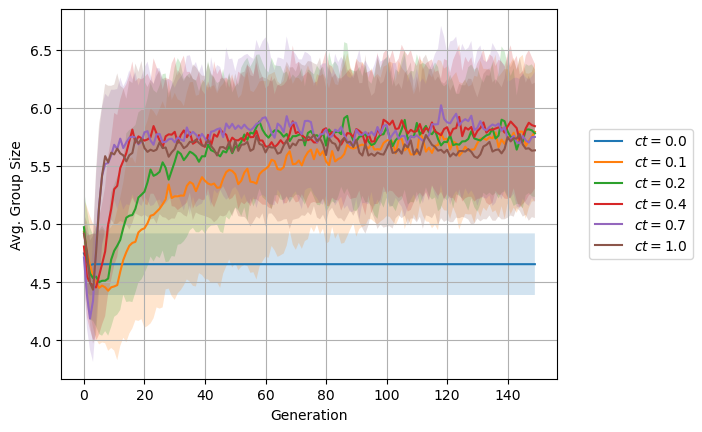

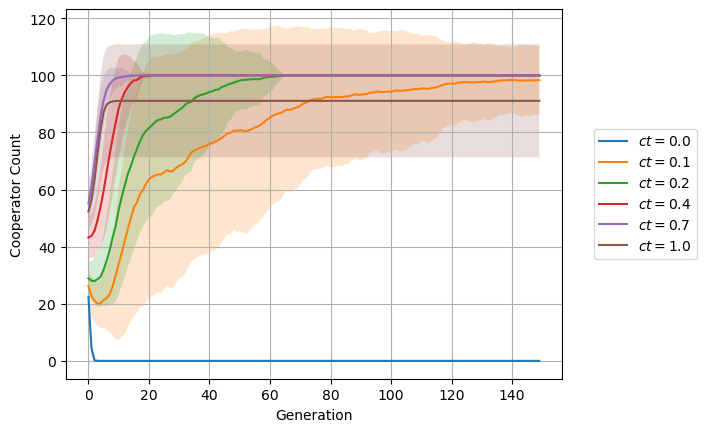

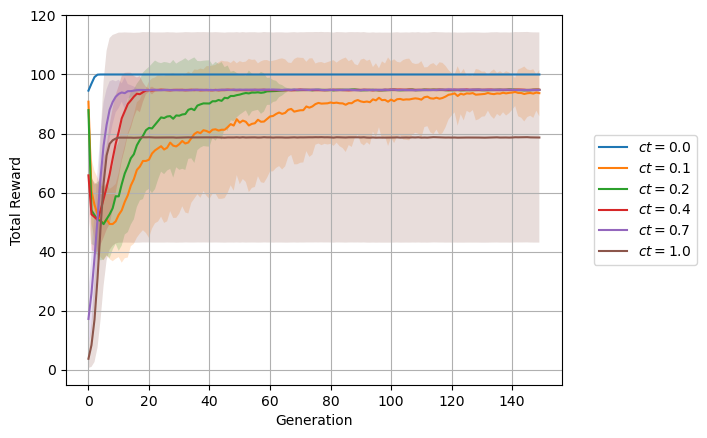

In [17]:

for j in range(len(frac_cooperation_thresholds)):
    i = j + len(const_cooperation_thresholds)
    plt.plot(mean_population_per_gen[i], label=f'$fct={frac_cooperation_thresholds[j]}$')
    plt.fill_between(np.arange(num_generations), mean_population_per_gen[i] - std_population_per_gen[i], 
                     mean_population_per_gen[i] + std_population_per_gen[i], alpha=0.2)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.ylabel('Avg. Group Size')
plt.xlabel('Generation')
plt.grid()
plt.savefig("..\\figures\\var_coop_threshold_y_avg_group_size_frac.png", bbox_inches='tight', transparent=True)
plt.show()

for j in range(len(frac_cooperation_thresholds)):
    i = j + len(const_cooperation_thresholds)
    plt.plot(mean_cooperation_per_gen[i], label=f'$fct={frac_cooperation_thresholds[j]}$')
    plt.fill_between(np.arange(num_generations), mean_cooperation_per_gen[i] - std_cooperation_per_gen[i], 
                     mean_cooperation_per_gen[i] + std_cooperation_per_gen[i], alpha=0.2)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.ylabel('Cooperator Count')
plt.xlabel('Generation')
plt.grid()
plt.savefig("..\\figures\\var_coop_threshold_y_cooperation_frac.png", bbox_inches='tight', transparent=True)
plt.show()

for j in range(len(frac_cooperation_thresholds)):
    i = j + len(const_cooperation_thresholds)
    plt.plot(mean_total_reward_per_gen[i], label=f'$fct={frac_cooperation_thresholds[j]}$')
    plt.fill_between(np.arange(num_generations), mean_total_reward_per_gen[i] - std_total_reward_per_gen[i], 
                     mean_total_reward_per_gen[i] + std_total_reward_per_gen[i], alpha=0.2)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.ylabel('Total Reward')
plt.xlabel('Generation')
plt.grid()
plt.savefig("..\\figures\\var_coop_threshold_y_total_reward_frac.png", bbox_inches='tight', transparent=True)
plt.show()


# Snowdrift (Fraction) Condensed

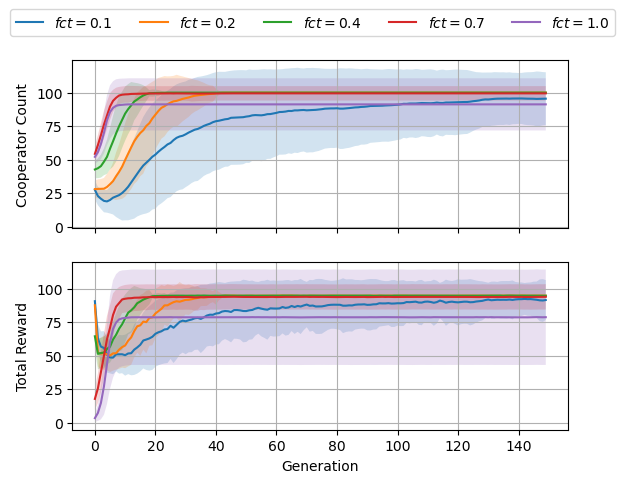

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6.4, 4.8))

for j in range(1, len(frac_cooperation_thresholds)):
    i = j + len(const_cooperation_thresholds)
    ax1.plot(mean_cooperation_per_gen[i], label=f'$fct={frac_cooperation_thresholds[j]}$')
    ax1.fill_between(np.arange(num_generations), mean_cooperation_per_gen[i] - std_cooperation_per_gen[i], 
                     mean_cooperation_per_gen[i] + std_cooperation_per_gen[i], alpha=0.2)
ax1.set(ylabel='Cooperator Count')
ax1.grid()

for j in range(1, len(frac_cooperation_thresholds)):
    i = j + len(const_cooperation_thresholds)
    ax2.plot(mean_total_reward_per_gen[i], label='')
    ax2.fill_between(np.arange(num_generations), mean_total_reward_per_gen[i] - std_total_reward_per_gen[i], 
                     mean_total_reward_per_gen[i] + std_total_reward_per_gen[i], alpha=0.2)
ax2.set(xlabel='Generation', ylabel='Total Reward')
ax2.grid()

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=5)

plt.savefig("..\\figures\\var_coop_threshold_condensed_frac.png", bbox_inches='tight', transparent=True)
plt.show()
